В этом скрипте объдиняются все 5 сессий

In [66]:
import mne 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [68]:
def find_peaks(array_, koef=1.1, max_flg=False, mean=0, std=0 , custom_mean_flg=False):
    
    mean_=np.mean(array_)
    std_=np.std(array_)
    
    if custom_mean_flg:
        mean_=mean
        std_=std

    max_=mean_+koef*std_
    min_=mean_-koef*std_
    
    max_array_=[max_]*len(array_)
    min_array_=[min_]*len(array_)
    
    print(max_)
    inds=np.where(array_>max_)[0]
    
    if max_flg:
        return inds, max_
    
    else:
        return inds

def reduce_peaks(marks_array_inds,  threhold, with_log=False,):
    
    new_marks_array_inds=[marks_array_inds[0]]
    for i in range(1,len(marks_array_inds)):
        if marks_array_inds[i]-new_marks_array_inds[-1]<threhold:   #-1 or i-1  минималньое расстояние между пиками?
            if with_log:
                print(i)
        else:
            new_marks_array_inds.append(marks_array_inds[i])

    return new_marks_array_inds

def reject_list_by_sigma(epochs_1, coef):

    data_epochs_1=epochs_1.get_data()
    mean_=np.mean(data_epochs_1,(0,2))
    std_=np.std(data_epochs_1,(0,2))

    max_=(mean_+coef*std_)
    min_=(mean_-coef*std_)

    axx=data_epochs_1.shape[0]
    axx2=data_epochs_1.shape[2]
    rej=[]

    for i in range(axx):
        for j in range(axx2):
            if np.sum(max_-data_epochs_1[i,:,j]<0)!=0 or np.sum(min_-data_epochs_1[i,:,j]>0)!=0:
                  rej.append(i)

        reject_list=np.unique(rej).tolist()
    return reject_list

In [70]:
%matplotlib qt5

## Загружаем все сессии

Предобработанные записи ЭЭГ и с планшета

In [124]:
subject='S105'

In [126]:
codes=['1','2','3','4','5']
code=codes[0]

In [128]:
handwriting=[]
eeg=[]
marks=[]
sensor=[]
sess=[]

for code in codes:
    e1=mne.read_epochs(subject+'/Epochs/'+str(code)+'/epochs_handwriting_tablet-epo.fif')
    e2=mne.read_epochs(subject+'/Epochs/'+str(code)+'/epochs-long-epo.fif')
    e3=mne.read_epochs(subject+'/Epochs/'+str(code)+'/epochs-marks-long-epo.fif')
    e4=e3.copy().drop_channels(['B'])
    np.loadtxt(subject+'/Epochs/'+code+'/events_array_tablet_data.csv').astype(int)
    
    sess.append(pd.read_excel('8_Sessions/Digits_Tyumen_'+str(code)+'.xlsx').iloc[1:] )

    handwriting.append(e1)
    eeg.append(e2)
    marks.append(e3)
    sensor.append(e4)


Reading C:\Users\khani\skolteh\WEEK1\WEEK1\S105\Epochs\1\epochs_handwriting_tablet-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =   -2000.00 ...    4000.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\khani\skolteh\WEEK1\WEEK1\S105\Epochs\1\epochs-long-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =   -2000.00 ...    7000.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\khani\skolteh\WEEK1\WEEK1\S105\Epochs\1\epochs-marks-long-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =   -2000.00 ...    7000.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Reading 

In [79]:
sess_df=pd.concat(sess).reset_index()[['Digit_text']]

In [81]:
sess_df

Digit_text
0             0
1             5
2             2
3             6
4             7
..          ...
240           5
241           3
242           2
243           6
244           3

[245 rows x 1 columns]

### S105

In [130]:
handwriting=[]
eeg=[]
marks=[]
sensor=[]
sess=[]

for code in codes:
    e1=mne.read_epochs(subject+'/Epochs/'+str(code)+'/epochs_handwriting_tablet-epo.fif')
    e2=mne.read_epochs(subject+'/Epochs/'+str(code)+'/epochs-long-epo.fif')
    e3=mne.read_epochs(subject+'/Epochs/'+str(code)+'/epochs-marks-long-epo.fif')
    e4=e3.copy().drop_channels(['B'])
    np.loadtxt(subject+'/Epochs/'+code+'/events_array_tablet_data.csv').astype(int)
    
    sess.append(pd.read_excel('8_Sessions/Digits_Tyumen_'+str(code)+'.xlsx').iloc[1:] )

    handwriting.append(e1)
    eeg.append(e2)
    marks.append(e4)
    sensor.append(e3)


Reading C:\Users\khani\skolteh\WEEK1\WEEK1\S105\Epochs\1\epochs_handwriting_tablet-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =   -2000.00 ...    4000.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\khani\skolteh\WEEK1\WEEK1\S105\Epochs\1\epochs-long-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =   -2000.00 ...    7000.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\khani\skolteh\WEEK1\WEEK1\S105\Epochs\1\epochs-marks-long-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =   -2000.00 ...    7000.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Reading 

In [132]:
sess_df=pd.concat(sess).reset_index()[['Digit_text']]

In [134]:

sess_df = sess_df.drop(index=196).reset_index(drop=True)

In [136]:
sess_df

Digit_text
0             0
1             5
2             2
3             6
4             7
..          ...
239           5
240           3
241           2
242           6
243           3

[244 rows x 1 columns]

## Объединяем эпохи всех сессий 

In [138]:
marks_all=mne.concatenate_epochs(marks)
sensor_all=mne.concatenate_epochs(sensor)
eeg_all=mne.concatenate_epochs(eeg)
handwriting_all=mne.concatenate_epochs(handwriting)


Not setting metadata
244 matching events found
No baseline correction applied
Not setting metadata
244 matching events found
No baseline correction applied
Not setting metadata
244 matching events found
No baseline correction applied
Not setting metadata
244 matching events found
No baseline correction applied


## Выбираем эпохи с артефактами для удаления 

In [140]:
drop_list=reject_list_by_sigma(eeg_all, 12) 

S101: 9.5 (12.24%)

S104: 9 (13.8%)

S105: 12 (14.3%)

In [142]:
len(drop_list)

35

In [144]:
len(drop_list)/len(eeg_all) *100 #примерно 10-15% должно быть

14.344262295081966

In [146]:
marks_all.drop(drop_list)
sensor_all.drop(drop_list)
eeg_all.drop(drop_list)
handwriting_all.drop(drop_list)

Dropped 35 epochs: 16, 22, 26, 37, 44, 52, 71, 72, 82, 84, 85, 86, 87, 88, 100, 101, 103, 116, 145, 146, 160, 162, 163, 171, 172, 187, 201, 202, 209, 221, 230, 232, 233, 238, 242
Dropped 35 epochs: 16, 22, 26, 37, 44, 52, 71, 72, 82, 84, 85, 86, 87, 88, 100, 101, 103, 116, 145, 146, 160, 162, 163, 171, 172, 187, 201, 202, 209, 221, 230, 232, 233, 238, 242
Dropped 35 epochs: 16, 22, 26, 37, 44, 52, 71, 72, 82, 84, 85, 86, 87, 88, 100, 101, 103, 116, 145, 146, 160, 162, 163, 171, 172, 187, 201, 202, 209, 221, 230, 232, 233, 238, 242
Dropped 35 epochs: 16, 22, 26, 37, 44, 52, 71, 72, 82, 84, 85, 86, 87, 88, 100, 101, 103, 116, 145, 146, 160, 162, 163, 171, 172, 187, 201, 202, 209, 221, 230, 232, 233, 238, 242


<EpochsArray | 209 events (all good), -2 – 4 s (baseline off), ~39.2 MB, data loaded,
 '0': 209>

In [148]:
sess_df = sess_df.drop(drop_list, axis=0) 
sess_df = sess_df.reset_index(drop=True)[['Digit_text']]

In [150]:
sess_df.index.tolist() 

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


## Нормализуем данные

приводим к одному масштабу (среднее значение 0, стандартное отклонение 1)

In [153]:
epochs_num=len(eeg_all)
epochs_duration=eeg_all._data.shape[-1]

In [155]:
ss=StandardScaler() 

In [157]:
marks_all

<EpochsArray | 209 events (all good), -2 – 7 s (baseline off), ~29.4 MB, data loaded,
 '0': 209>

In [159]:
# S105
marks_data=np.squeeze(marks_all._data[:,0,:])#.flatten().reshape(-1,1)  все данные для канала 1
marks_data_sq=marks_data*10
marks_data_sc=ss.fit_transform(marks_data.flatten().reshape(-1,1)).reshape(epochs_num,epochs_duration) #нормализуем метки 
#flatten в одномерный массив, reshape в вектор-столбец,после СС приводим к прежней форме - кол-во эпох * кол-во временных точек в каждой эпохе

print(marks_data.shape, marks_data_sc.shape)

(209, 18433) (209, 18433)


In [106]:
marks_data=np.squeeze(marks_all._data[:,1,:])#.flatten().reshape(-1,1)  все данные для канала 1
marks_data_sq=marks_data*10
marks_data_sc=ss.fit_transform(marks_data.flatten().reshape(-1,1)).reshape(epochs_num,epochs_duration) #нормализуем метки 
#flatten в одномерный массив, reshape в вектор-столбец,после СС приводим к прежней форме - кол-во эпох * кол-во временных точек в каждой эпохе

print(marks_data.shape, marks_data_sc.shape)

(211, 18433) (211, 18433)


Not setting metadata
209 matching events found
No baseline correction applied
0 projection items activated


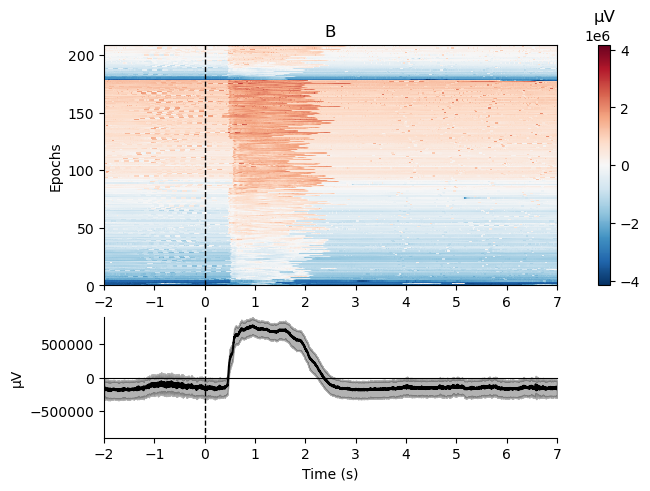

[<Figure size 640x480 with 3 Axes>]

In [161]:
%matplotlib inline
marks_data_sc=marks_data_sc.reshape(epochs_num,1,epochs_duration)
sensor_all._data=marks_data_sc
sensor_all.plot_image([0])

## Считаем длительность письма и удаляем эпохи с слишком длинным (больше 2 секунд) письмом

In [164]:
sh_list = []
notfound = []
for i in range(len(handwriting_all)):
    indices_3 = np.where(handwriting_all._data[i, 0, :] == -3)[0]
    indices_2 = np.where(handwriting_all._data[i, 0, :] == -2)[0]
    
    if len(indices_3) > 0 and len(indices_2) > 0:
        sh = indices_3[0] - indices_2[0]
        sh_list.append(sh)
    else:
        notfound.append(i)
        print(f"В {i} не найдены -3 или -2")

В 0 не найдены -3 или -2


In [48]:
sh_list

[2148,
 2563,
 2915,
 3048,
 2430,
 2739,
 3154,
 8034,
 -514,
 3295,
 3160,
 2535,
 3571,
 7170,
 2568,
 2744,
 2813,
 1356,
 3295,
 7276,
 7039,
 1808,
 3299,
 3263,
 3193,
 1805,
 3989,
 3926,
 3197,
 2570,
 3126,
 3506,
 3233,
 3261,
 3194,
 2747,
 2677,
 3266,
 1429,
 2541,
 3025,
 1599,
 4987,
 2707,
 2574,
 2397,
 2188,
 1356,
 3096,
 2503,
 2470,
 1426,
 2711,
 2711,
 2470,
 2367,
 2157,
 2051,
 3195,
 2087,
 2538,
 2815,
 1218,
 2294,
 3266,
 2607,
 2673,
 2397,
 2227,
 2471,
 2777,
 2776,
 2750,
 2919,
 2748,
 2780,
 3124,
 3443,
 2052,
 2605,
 2262,
 2366,
 1983,
 2365,
 1221,
 2396,
 2990,
 1427,
 1637,
 2506,
 2053,
 2536,
 2571,
 6346,
 2574,
 2887,
 3296,
 2502,
 2575,
 2435,
 2573,
 2538,
 3093,
 3753,
 1567,
 2508,
 2642,
 2814,
 2711,
 2575,
 2538,
 3512,
 3200,
 3093,
 2539,
 2676,
 2574,
 3024,
 2611,
 2470,
 3367,
 2847,
 3650,
 3646,
 2782,
 2644,
 2814,
 1325,
 2644,
 2782,
 3025,
 1916,
 1708,
 3336,
 3713,
 2609,
 1359,
 2641,
 2506,
 2782,
 2265,
 2609,
 1637,

In [50]:
drop_list_new=np.where(np.array(sh_list)>4096)[0] # чтобы соответствовало 2 секундам (S101)

In [166]:
drop_list_new=np.where(np.array(sh_list)>5120)[0] # чтобы соответствовало 2.5 секундамb (S104)

(array([ 1.,  0.,  0.,  6., 25., 31., 70., 48., 22.,  5.]),
 array([ -28. ,  460.7,  949.4, 1438.1, 1926.8, 2415.5, 2904.2, 3392.9,
        3881.6, 4370.3, 4859. ]),
 <BarContainer object of 10 artists>)

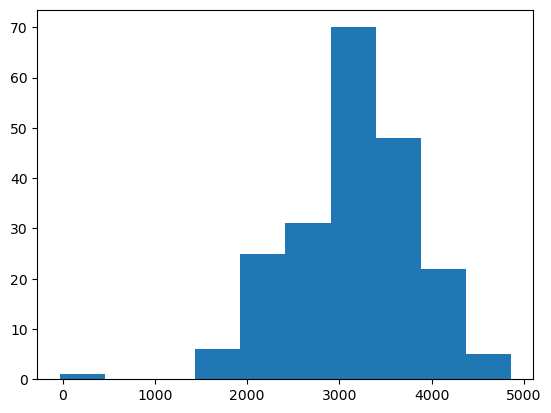

In [168]:
plt.hist(sh_list)


In [170]:
marks_all.drop(drop_list_new)
sensor_all.drop(drop_list_new)
eeg_all.drop(drop_list_new)
handwriting_all.drop(drop_list_new)
sess_df=sess_df.drop(drop_list_new, axis=0).reset_index()[['Digit_text']]

Dropped 0 epochs: 
Dropped 0 epochs: 
Dropped 0 epochs: 
Dropped 0 epochs: 


In [172]:
marks_all.drop(notfound)
sensor_all.drop(notfound)
eeg_all.drop(notfound)
handwriting_all.drop(notfound)
sess_df=sess_df.drop(notfound, axis=0).reset_index()[['Digit_text']]

Dropped 1 epoch: 0
Dropped 1 epoch: 0
Dropped 1 epoch: 0
Dropped 1 epoch: 0


## Сохраняем список цифр

In [313]:
sess_df.to_csv(subject+'/5_Files_for_model/Digits_trials_final.xlsx')

In [184]:
marks_all.get_data

<bound method get_data of <EpochsArray | 208 events (all good), -2 – 7 s (baseline off), ~29.3 MB, data loaded,
 '0': 208>>

## Графики

In [176]:
mean=np.average(marks_all._data,0)
mean_B=mean[0]
mean_C=mean[1]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [174]:
#S105
mean=np.average(marks_all._data,0)
mean_B=mean[1]
mean_C=mean[0]

IndexError: index 1 is out of bounds for axis 0 with size 1

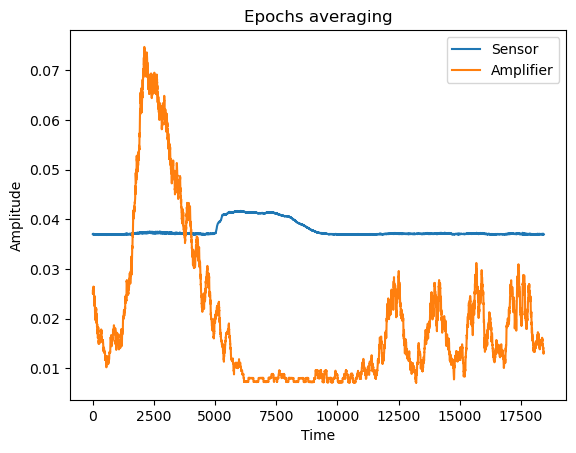

In [322]:
plt.plot(mean_B, label='Sensor')
plt.plot(mean_C,label='Amplifier')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Epochs averaging')
plt.legend()
plt.show()

На графике выше для S101 давление на планшет начинается в среднем ближе к концу появления чисел. Логично.

На графике ниже показано место, где испытуемый начал писать

0.09151106995725244


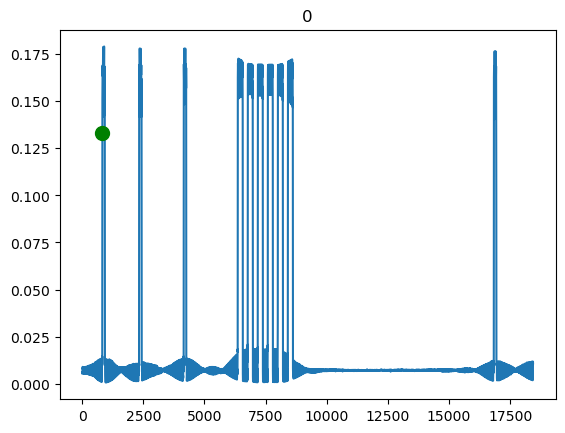

0.05657764063190901


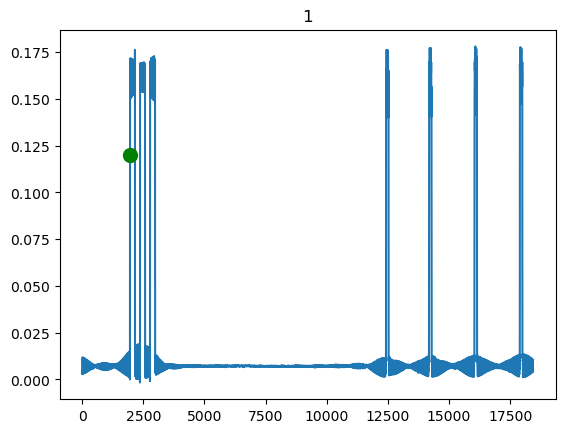

0.08815872416372658


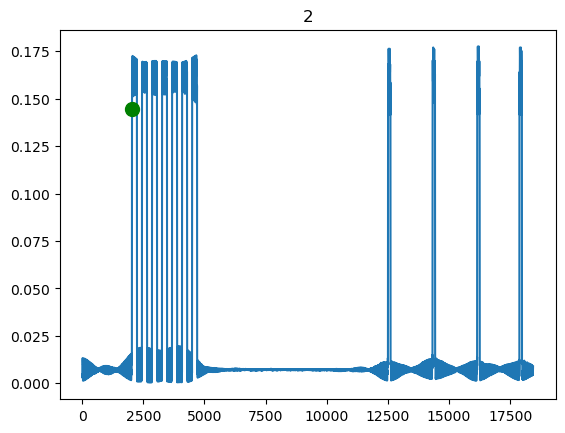

0.09802915227189088


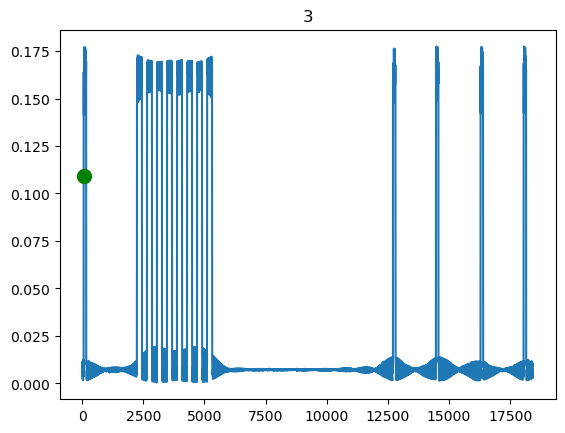

0.1092340707892337


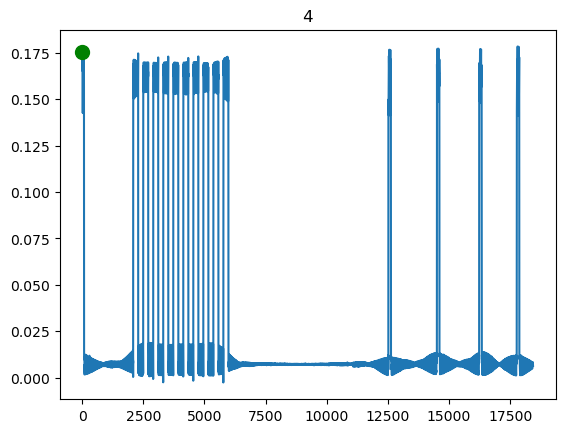

0.056643548867982896


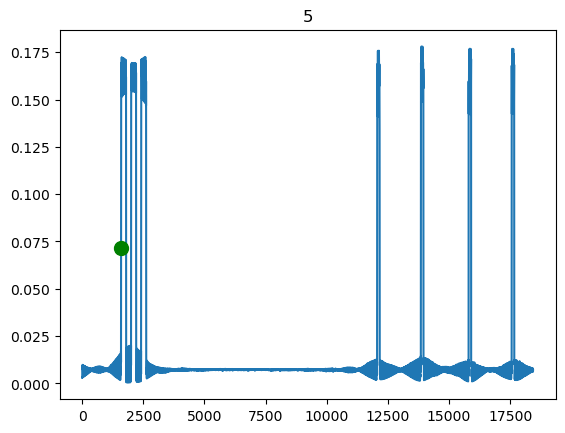

0.0737373457158196


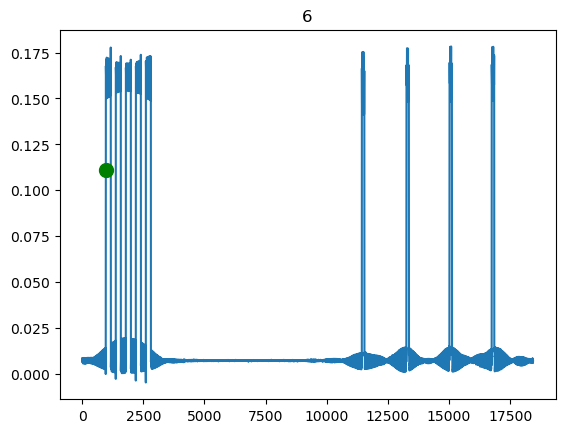

0.08826353336270512


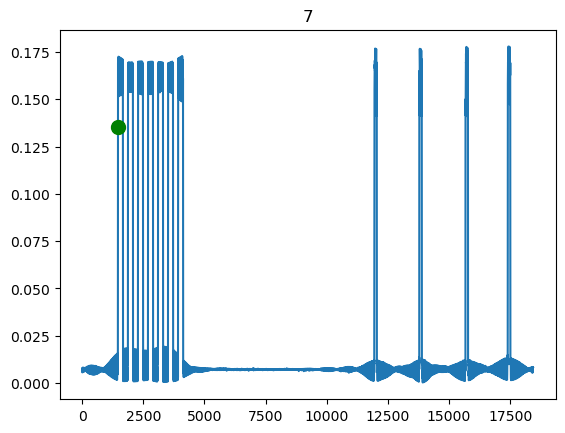

0.06588546715274965


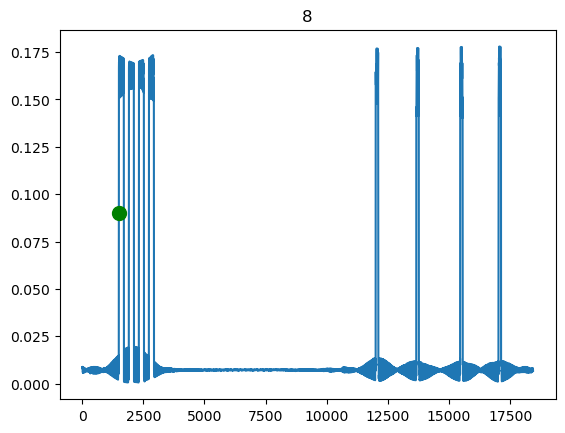

0.08464637336483588


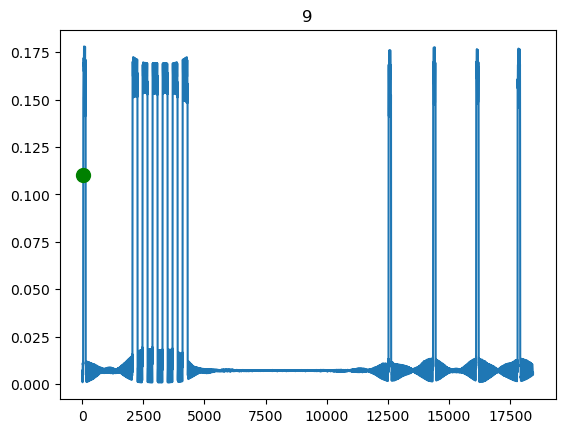

0.09450580393287675


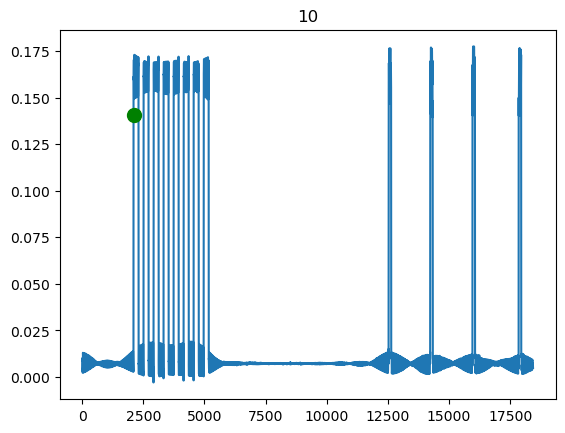

0.08075457218655595


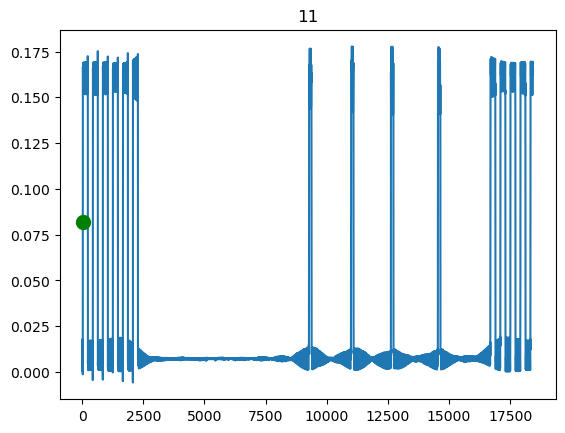

0.0459078637101947


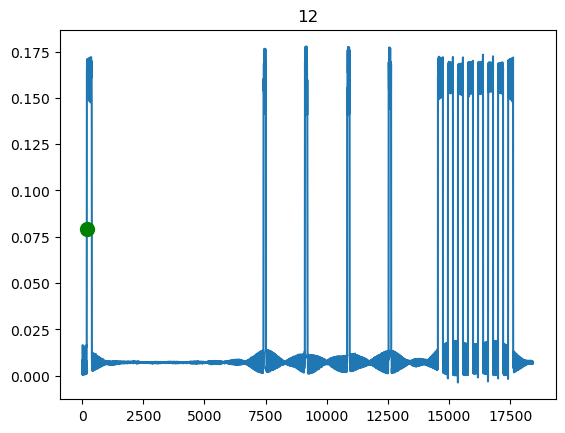

0.09425571150758222


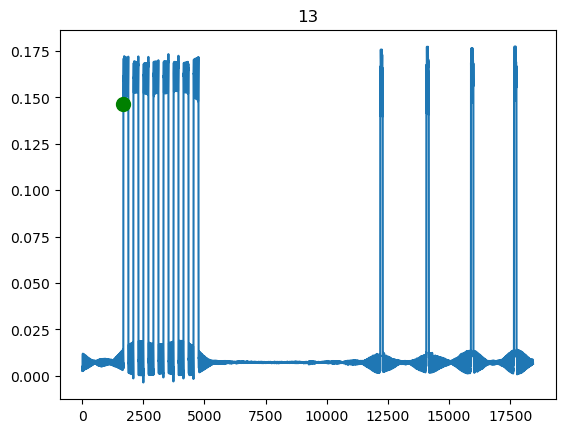

0.03359827582200797


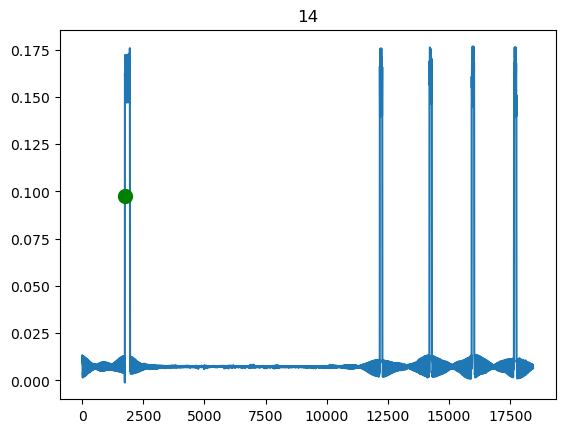

0.09292942120879659


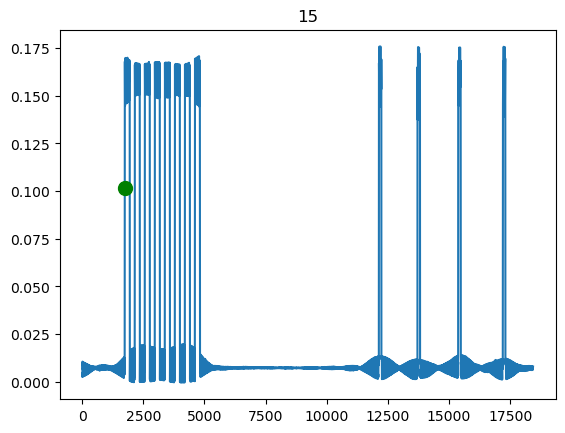

0.0332243737526681


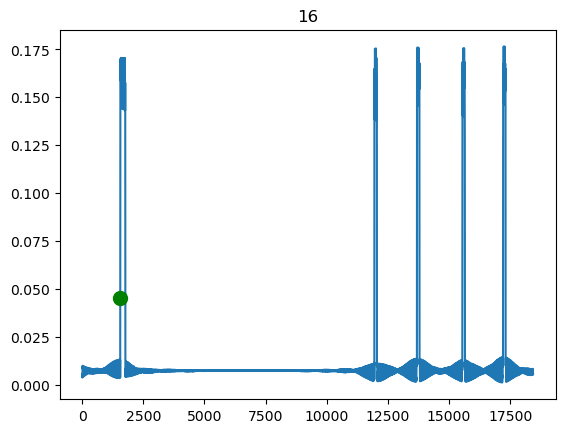

0.03330661280810798


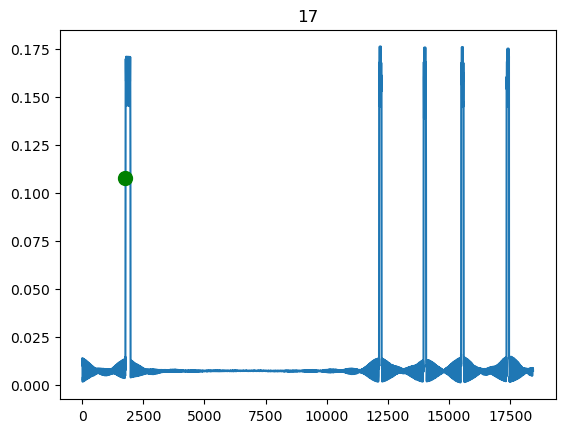

0.07594064292990865


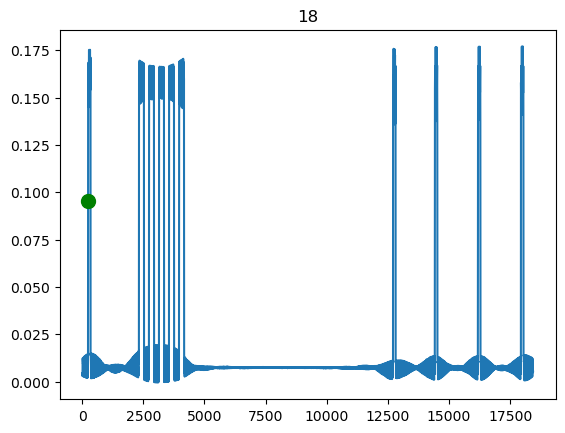

0.04546942427069663


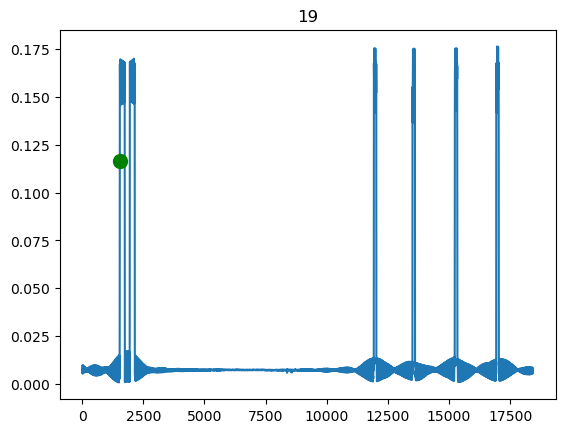

0.0647092814250693


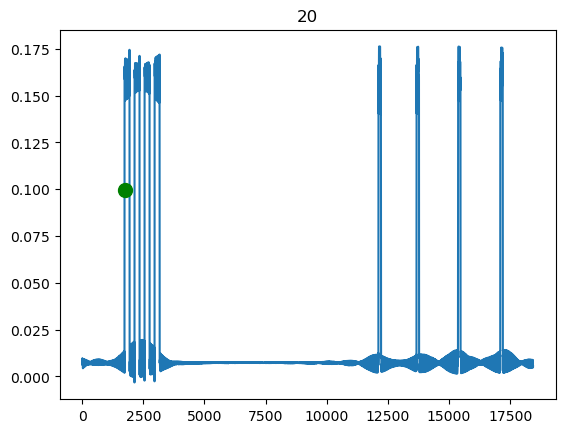

0.08701774073525903


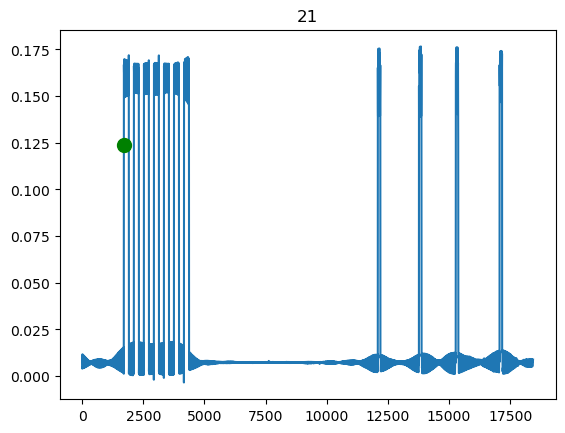

0.09345744726492507


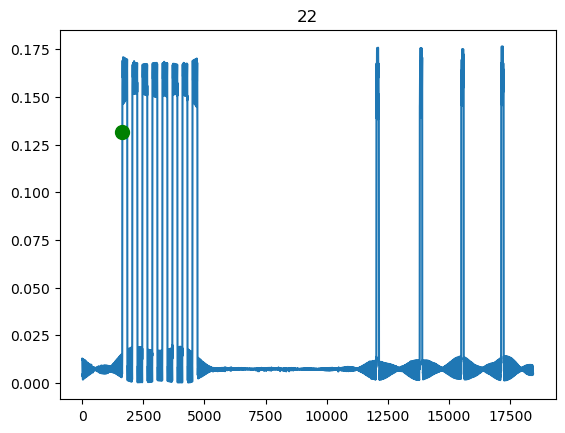

0.06434028633981594


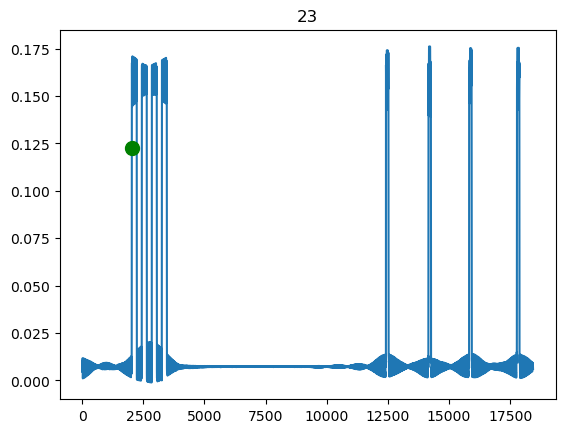

0.05800846762441442


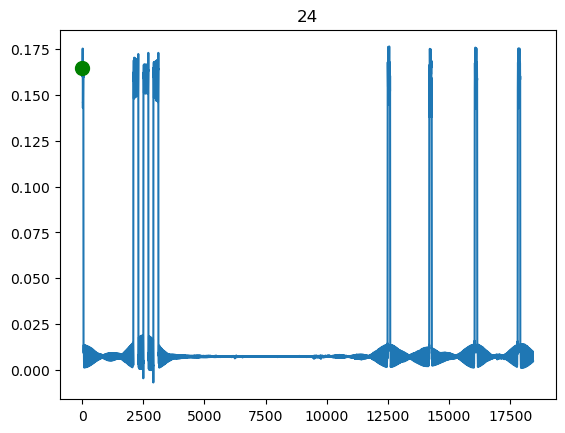

0.0719023330323669


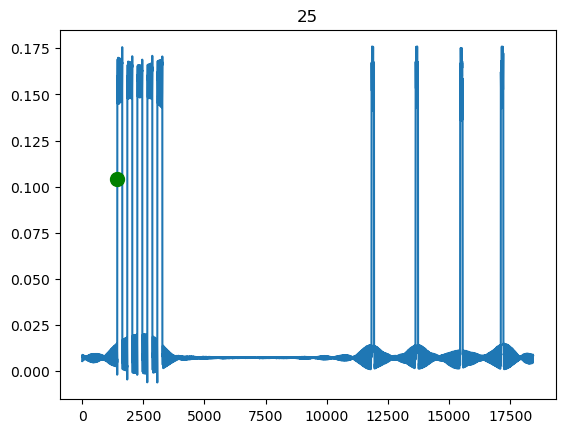

0.045315063475699725


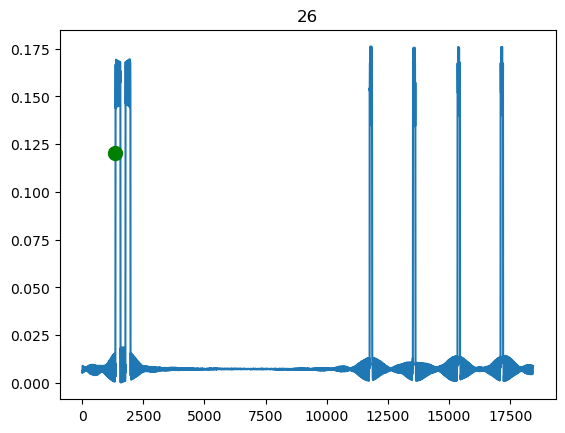

0.08574089954962656


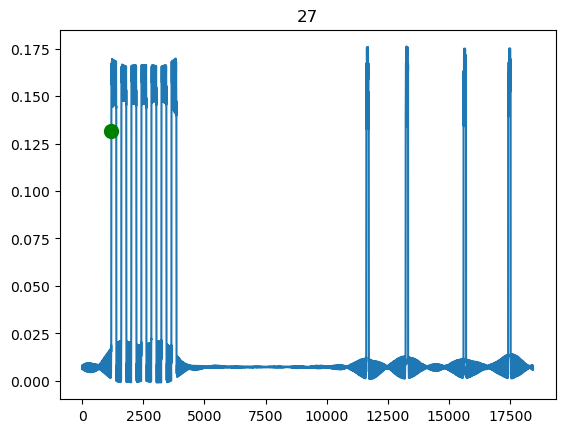

0.10401054043247991


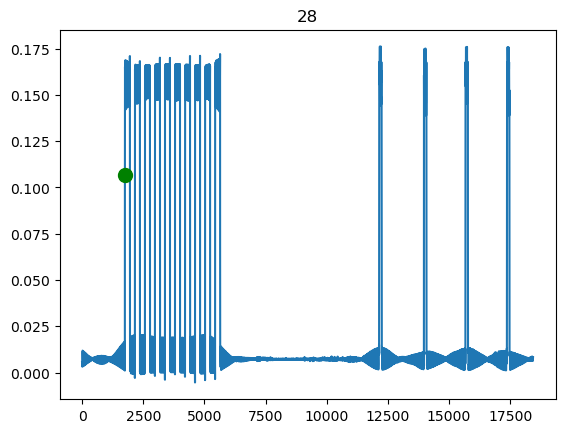

0.05577353274916344


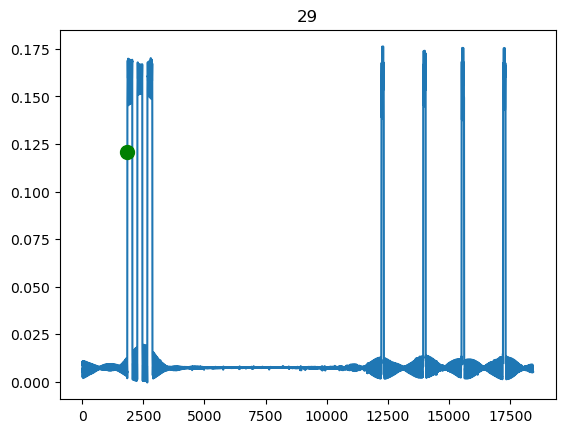

In [324]:
inds=[]
#отметки стоят там, где начало письма. 
for i in range(0,30):
    plt.figure()
    plt.title(str(i))
    tr_=marks_all._data[i][0,0:(marks_all._data[i].shape[1]//2)]
    
    mean_at=np.mean(tr_)
    std_at=np.std(tr_)
    at=marks_all._data[i][0]
    ind=find_peaks(at, koef=1,mean=mean_at, std=std_at, custom_mean_flg=True)[0]
    inds.append(ind)
    plt.plot(np.arange(len(at)),at)
    plt.plot(ind, at[ind], '.g', markersize=20)
    plt.show() 

## Вызванные потенциалы

Not setting metadata
208 matching events found
No baseline correction applied
0 projection items activated


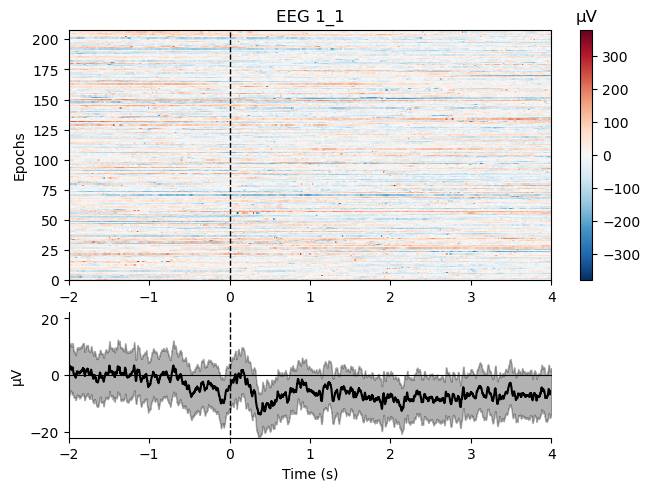

Not setting metadata
208 matching events found
No baseline correction applied
0 projection items activated


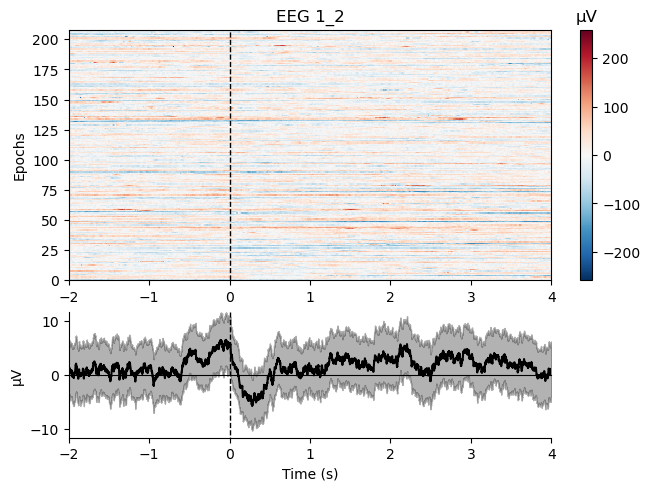

Not setting metadata
208 matching events found
No baseline correction applied
0 projection items activated


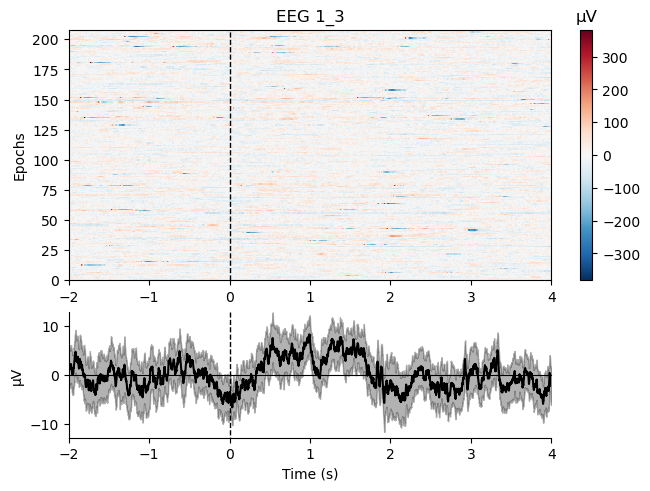

Not setting metadata
208 matching events found
No baseline correction applied
0 projection items activated


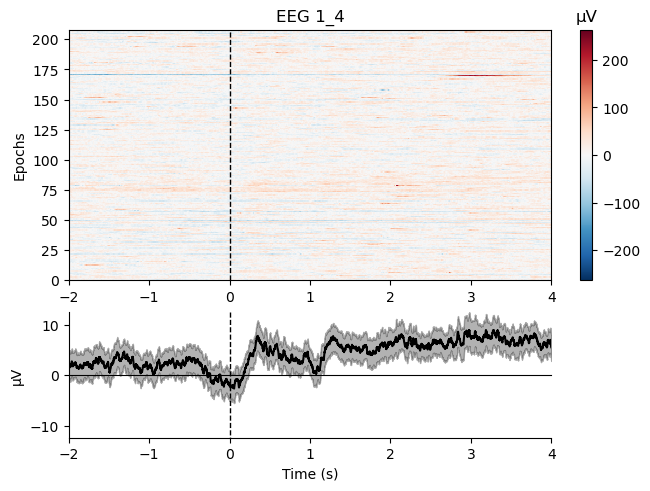

Not setting metadata
208 matching events found
No baseline correction applied
0 projection items activated


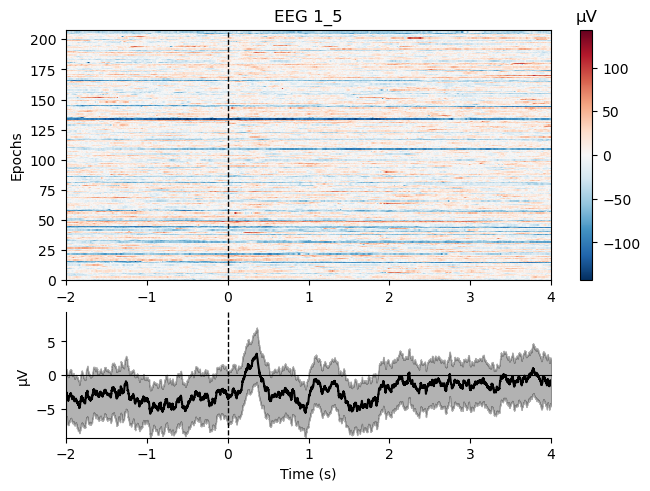

Not setting metadata
208 matching events found
No baseline correction applied
0 projection items activated


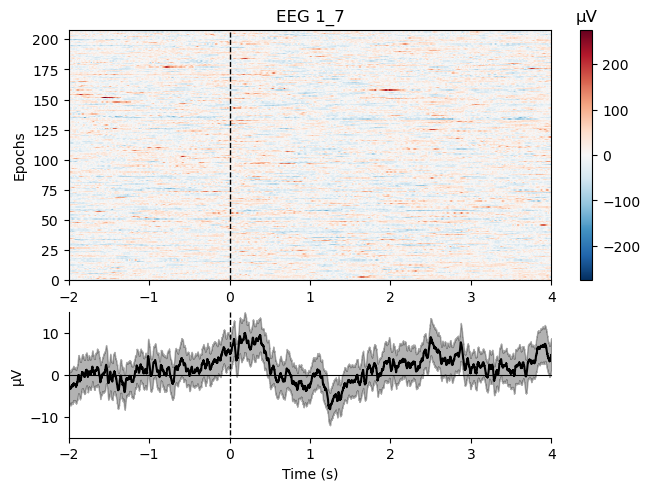

Not setting metadata
208 matching events found
No baseline correction applied
0 projection items activated


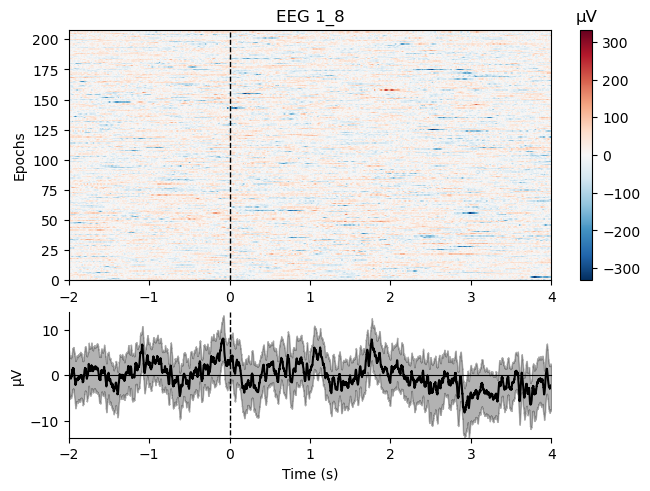

Not setting metadata
208 matching events found
No baseline correction applied
0 projection items activated


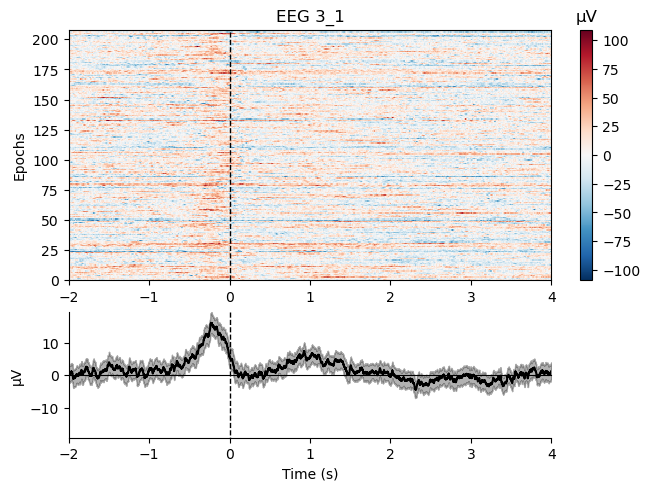

Not setting metadata
208 matching events found
No baseline correction applied
0 projection items activated


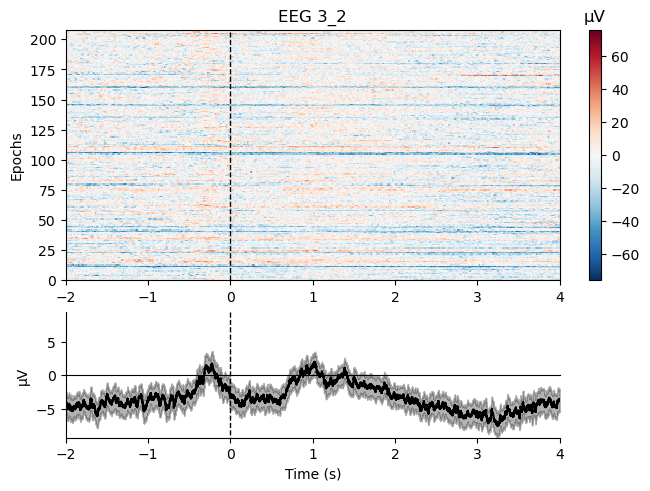

Not setting metadata
208 matching events found
No baseline correction applied
0 projection items activated


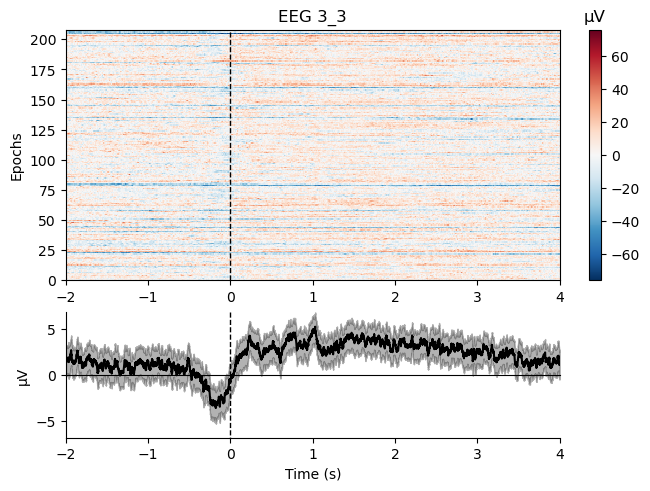

Not setting metadata
208 matching events found
No baseline correction applied
0 projection items activated


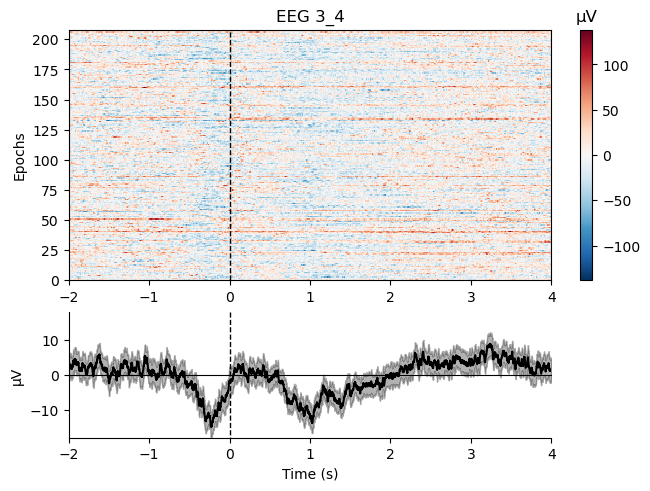

In [186]:
import os
for i in range(len(eeg_all.ch_names)):
    fig = eeg_all.copy().crop(-2, 4).plot_image([i])
    fig[0].savefig(os.path.join(subject, f'EP_{i}.png'))
    plt.close(fig[0])

Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated


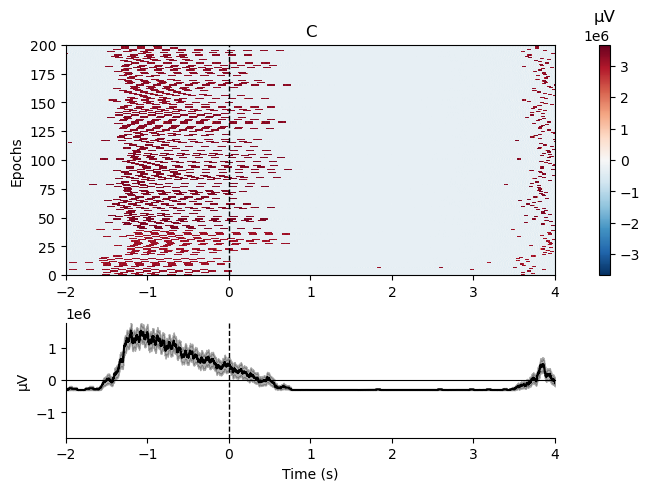

[<Figure size 640x480 with 3 Axes>]

In [133]:
sensor_all.copy().crop(-2,4).plot_image([0])

Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated


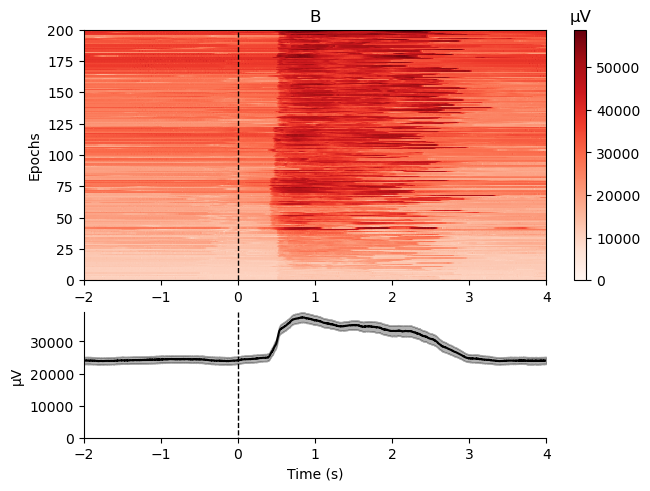

[<Figure size 640x480 with 3 Axes>]

In [135]:
marks_all.copy().crop(-2,4).plot_image([0])

По графикам видно, что ВП до письма (с сенсора). На некоторых каналах можно заметить увеличение амплитуды как раз после момента начала письма, но это требует более точного анализа.

## Сохраняем

In [328]:
marks_all.save(subject+'/5_Files_for_model/epochs_marks_2-epo.fif', overwrite=True)
sensor_all.save(subject+'/5_Files_for_model/epochs_sensors_2-epo.fif', overwrite=True)
eeg_all.save(subject+'/5_Files_for_model/epochs_eeg_2-epo.fif', overwrite=True)
handwriting_all.save(subject+'/5_Files_for_model/epochs_handwriting_2-epo.fif', overwrite=True)

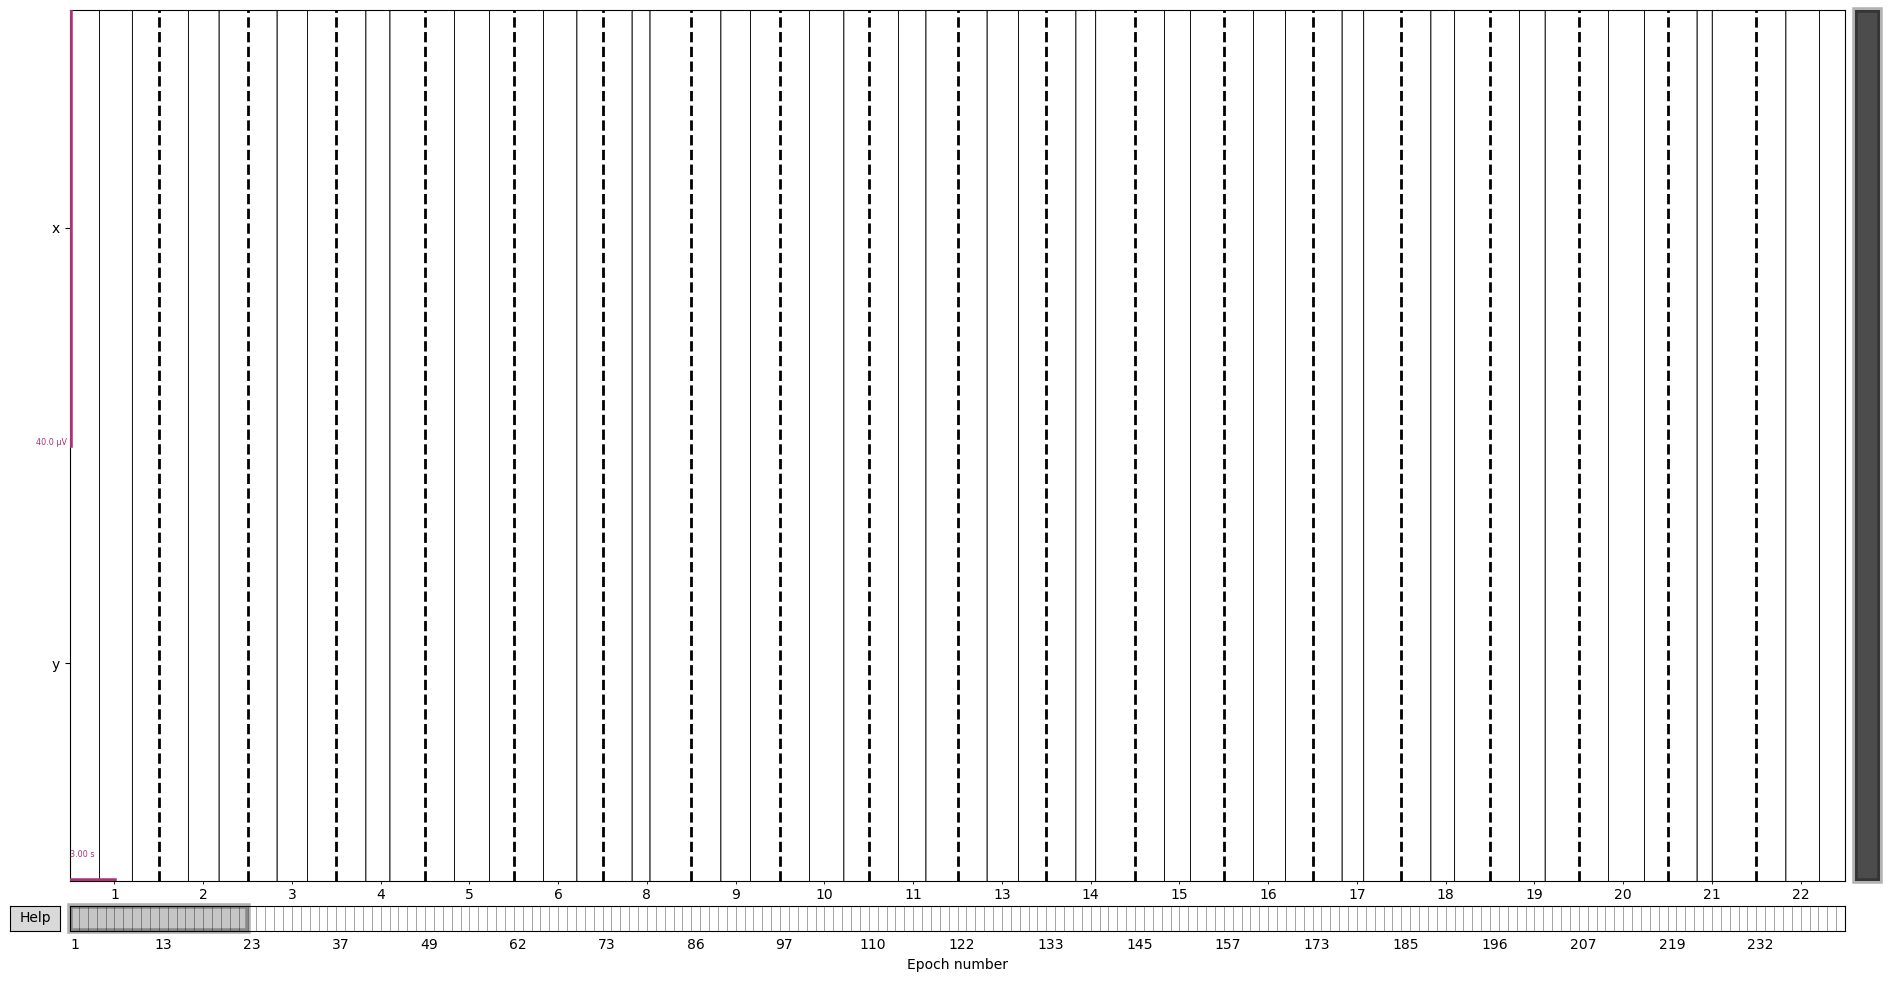

In [275]:
%matplotlib qt5
handwriting_all.plot()